In [3]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
ng.setDirectory('indirectsweep')

In [16]:
ng.configureSweep(popscale=0.5, BaseStim = 2.3, WrongStim = [2.50], RightStim = [2.54], Dynamic=[30], direct=[1], indirect=[0.95,1,1.05])

3

In [17]:
ng.compileAndRunSweep(2000,0,3)

KeyboardInterrupt: 

In [38]:
results = ng.readAllTrialResults(760,0,3)

In [39]:
decisions = []
for sn in range(3):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [56]:
rightreact = []
wrongreact = []
allreact = []
accuracy = []
completed = []
for sn in range(3):
    rightreact.append([])
    wrongreact.append([])
    allreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
            allreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)

In [60]:
allreact[2]

[138.00833129882812,
 448.0272216796875,
 183.01107788085938,
 147.00888061523438,
 160.00967407226562,
 149.00900268554688,
 166.01004028320312,
 381.02313232421875,
 154.00930786132812,
 173.01046752929688,
 137.00827026367188,
 136.00820922851562,
 215.01300048828125,
 352.0213623046875,
 280.0169677734375,
 152.00918579101562,
 314.01904296875,
 121.00729370117188,
 184.01113891601562,
 129.00778198242188,
 92.005523681640625,
 344.0208740234375,
 141.00851440429688,
 150.00906372070312,
 164.00991821289062,
 389.02362060546875,
 116.00698852539062,
 169.01022338867188,
 150.00906372070312,
 131.00790405273438,
 336.0203857421875,
 169.01022338867188,
 82.004913330078125,
 127.00765991210938,
 109.00656127929688,
 159.00961303710938,
 319.01934814453125,
 145.00875854492188,
 283.01715087890625,
 242.0146484375,
 372.0225830078125,
 133.00802612304688,
 141.00851440429688,
 133.00802612304688,
 238.014404296875,
 184.01113891601562,
 138.00833129882812,
 151.00912475585938,
 147.00

In [31]:
for sn in range(3):
    print(sum(rightreact[sn]) / len(rightreact[sn]), sum(wrongreact[sn]) / len(wrongreact[sn]))

159.148109016 152.013364912
185.55894217 169.660002888
211.750068536 184.939758301


In [32]:
for sn in range(3):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])))

156.812213344
180.946142407
204.493851003


In [33]:
print(accuracy,completed)

[0.6726027397260274, 0.7098674521354934, 0.7293497363796133] [0.9605263157894737, 0.8934210526315789, 0.7486842105263158]


1 0.95
1 1
1 1.05


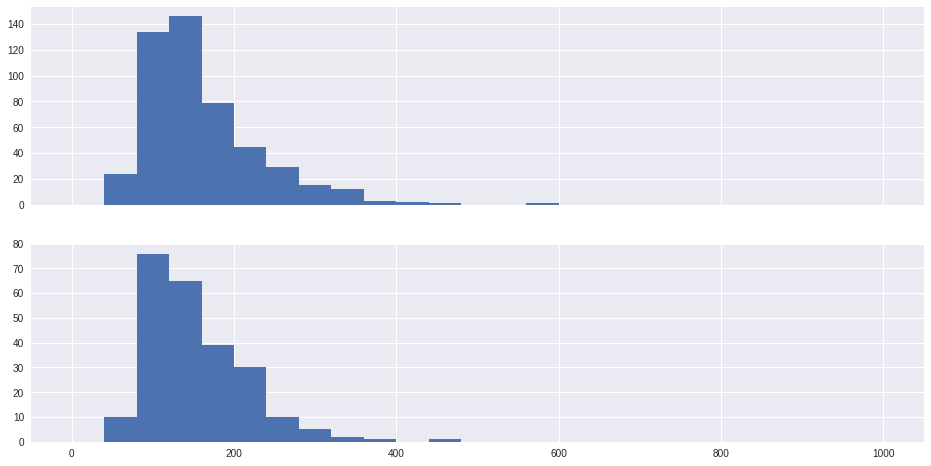

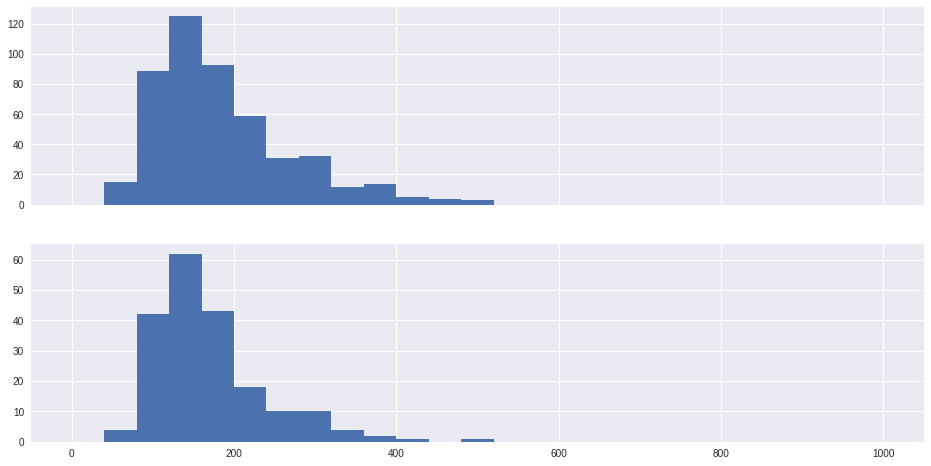

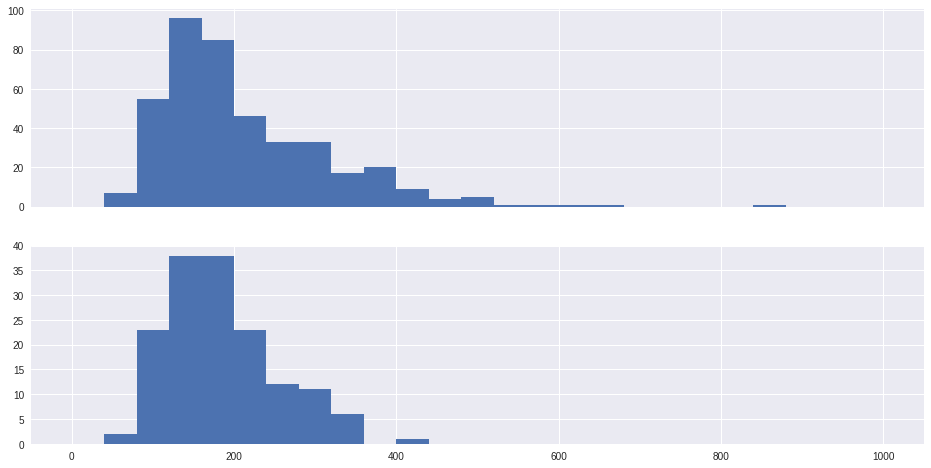

In [34]:
for sn in range(3):
    print(results[sn][0]['direct'], results[sn][0]['indirect'])
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)
    pd.Series(rightreact[sn]).hist(bins=25, range=[0,1000], ax=ax1)
    pd.Series(wrongreact[sn]).hist(bins=25, range=[0,1000], ax=ax2)
    plt.savefig('/home/mclapp/RTs_direct'+str(results[sn][0]['direct']*100)+'%_indirect'+str(results[sn][0]['indirect']*100)+'%.png')

In [55]:
summary = open('summary.txt', 'w')
summary.write("direct,indirect,result,rt\n")
for sn in range(3):
    for result in results[sn]:
        if (result['outputs']['decision made']['pathvals'] is not None):
            if(result['direct'] < 1):
                summary.write("low,")
            elif(result['direct'] > 1):
                summary.write("high,")
            else:
                summary.write("mid,")
            if(result['indirect'] < 1):
                summary.write("low,")
            elif(result['indirect'] > 1):
                summary.write("high,")
            else:
                summary.write("mid,")
            summary.write(str(result['outputs']['decision made']['pathvals'][0]) + ',')
            summary.write(str(result['outputs']['decision made']['delay']))
            summary.write("\n")
    summary.flush()
summary.close()